In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_18671/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression,\
    LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, f1_score, \
    balanced_accuracy_score, cohen_kappa_score, roc_auc_score
import sklearn.metrics as sklm

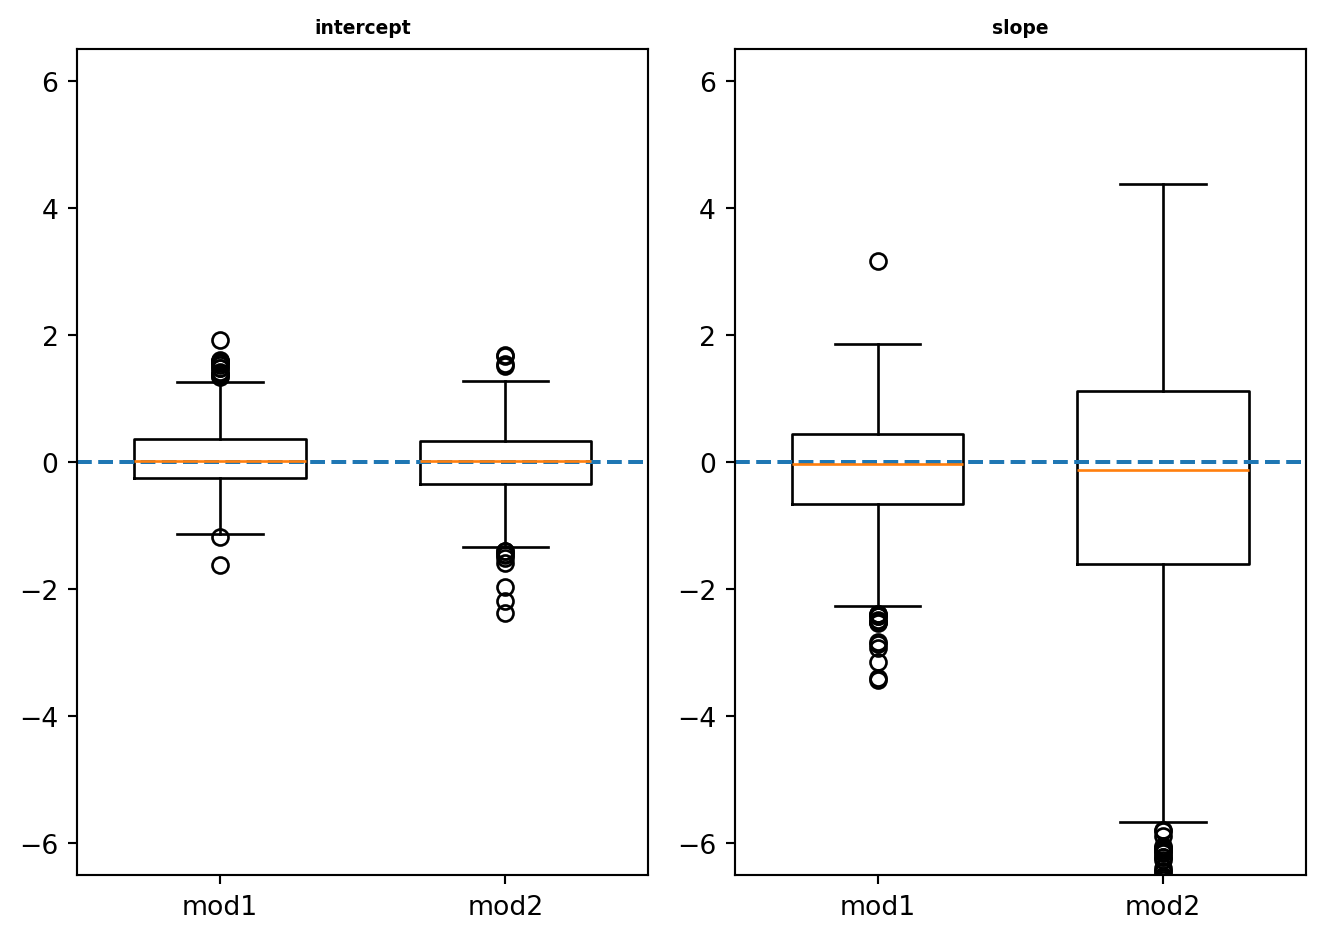

In [3]:
rng = np.random.default_rng(seed=1234)
n=200
N=1000
beta1_m1 = np.repeat(0.0, N)
beta2_m1 = np.repeat(0.0, N)
beta1_m2 = np.repeat(0.0, N)
beta2_m2 = np.repeat(0.0, N)
for k in range(0,N):
    X = rng.uniform(0,1,n)
    Z1 = 3 - 6*X
    Z2 = -1 - 6*X
    p1 = np.exp(Z1)/(1+np.exp(Z1))
    p2 = np.exp(Z2)/(1+np.exp(Z2))
    Y1 = np.repeat(0,n)
    Y2 = np.repeat(0,n)
    for i in range(0,n):
        Y1[i] = rng.binomial(1, p1[i], size=1)[0]
        Y2[i] = rng.binomial(1, p2[i], size=1)[0]
    df=pd.DataFrame({"X": X, "Y1": Y1, "Y2": Y2})
    mod1 = smf.glm("Y1~1+X", data=df, family=sm.families.Binomial()).fit()
    mod2 = smf.glm("Y2~1+X", data=df, family=sm.families.Binomial()).fit()
    beta1_m1[k] = mod1.params.Intercept - 3
    beta2_m1[k] = mod1.params.X + 6
    beta1_m2[k] = mod2.params.Intercept + 1
    beta2_m2[k] = mod2.params.X + 6


labels = ["mod1", "mod2"]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot([beta1_m1, beta1_m2], tick_labels=labels, widths=0.6)
ax1.set_ylim(-6.5,6.5)
ax1.axhline(0, linestyle='dashed')
ax1.set_title('intercept', {'fontweight': "bold", 'fontsize': 7})
ax2.boxplot([beta2_m1, beta2_m2], tick_labels=labels, widths=0.6)
ax2.set_ylim(-6.5,6.5)
ax2.axhline(0, linestyle='dashed')
ax2.set_title("slope", {'fontweight': "bold", 'fontsize': 7})
fig.tight_layout()

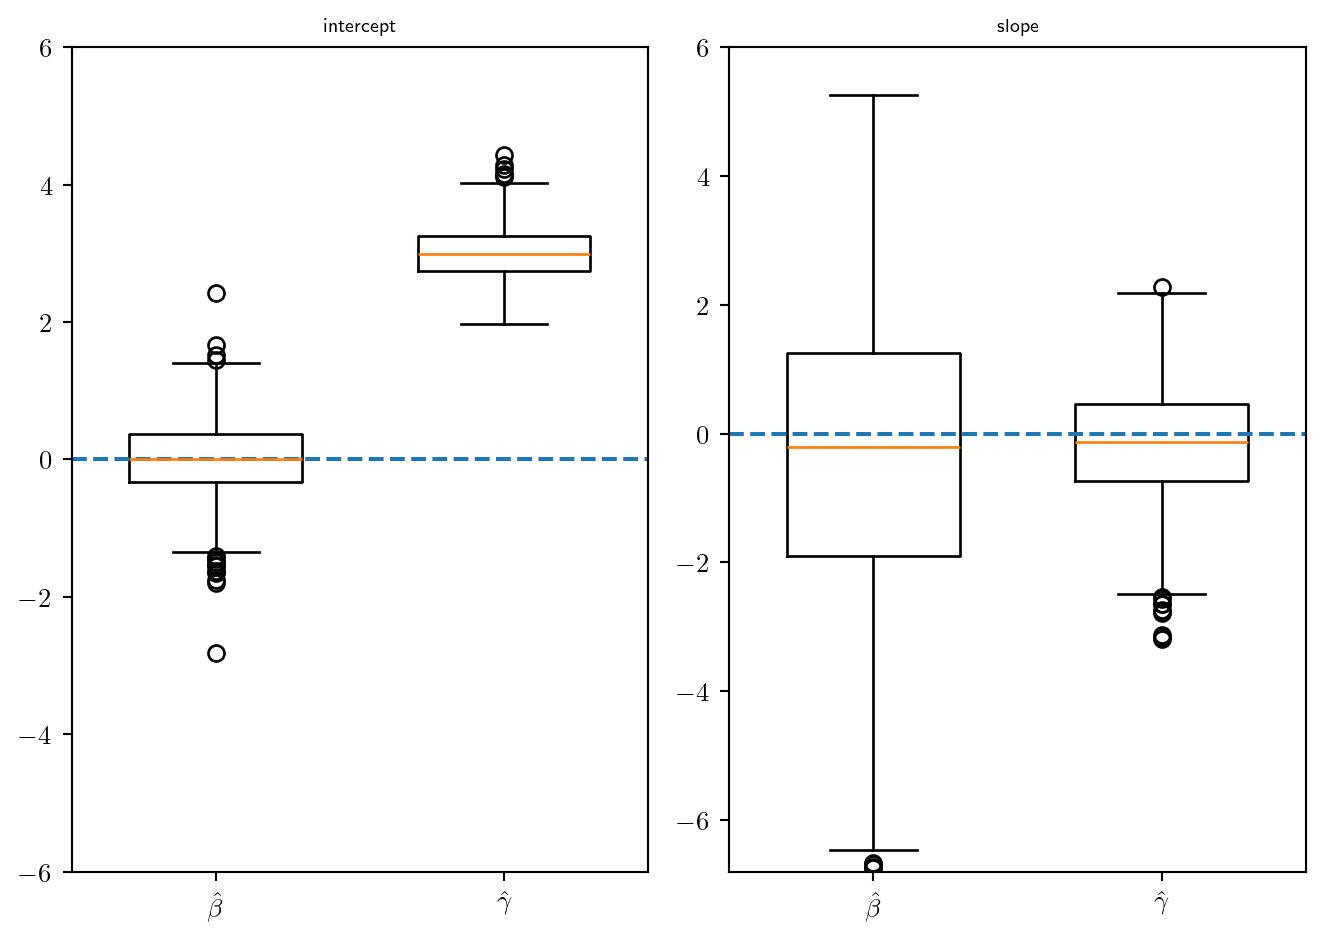

In [4]:
rng = np.random.default_rng(seed=1234)
n=200
N=1000
beta1_m2 = np.repeat(0.0, N)
beta2_m2 = np.repeat(0.0, N)
beta1_m3 = np.repeat(0.0, N)
beta2_m3 = np.repeat(0.0, N)
for k in range(0,N):
    X = rng.uniform(0,1,n)
    Z2 = -1 - 6*X
    p2 = np.exp(Z2)/(1+np.exp(Z2))
    Y2 = np.repeat(0,n)
    Y3 = np.repeat(0,n)
    for i in range(0,n):
        s = 0
        Y2[i] = rng.binomial(1, p2[i], size=1)[0]
        while (s==0):
            Y3[i] = rng.binomial(1, p2[i], size=1)[0]
            tau = Y3[i]*0.95 + (1-Y3[i])*0.05
            s = rng.binomial(1, tau, size=1)[0]
    df=pd.DataFrame({"X": X, "Y2": Y2, "Y3": Y3})
    mod2 = smf.glm("Y2~1+X", data=df, family=sm.families.Binomial()).fit()
    mod3 = smf.glm("Y3~1+X", data=df, family=sm.families.Binomial()).fit()
    beta1_m2[k] = mod2.params.Intercept + 1
    beta2_m2[k] = mod2.params.X + 6
    beta1_m3[k] = mod3.params.Intercept + 1
    beta2_m3[k] = mod3.params.X + 6



plt.rcParams.update({"text.usetex": True})
labels = [r"$\hat\beta$", r"$\hat\gamma$"]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot([beta1_m2, beta1_m3], tick_labels=labels, widths=0.6)
ax1.set_ylim(-6,6)
ax1.axhline(0, linestyle='dashed')
ax1.set_title('intercept', {'fontweight': "bold", 'fontsize': 7})
ax2.boxplot([beta2_m2, beta2_m3], tick_labels=labels, widths=0.6)
ax2.set_ylim(-6.8,6)
ax2.axhline(0, linestyle='dashed')
ax2.set_title("slope", {'fontweight': "bold", 'fontsize': 7})
fig.tight_layout()

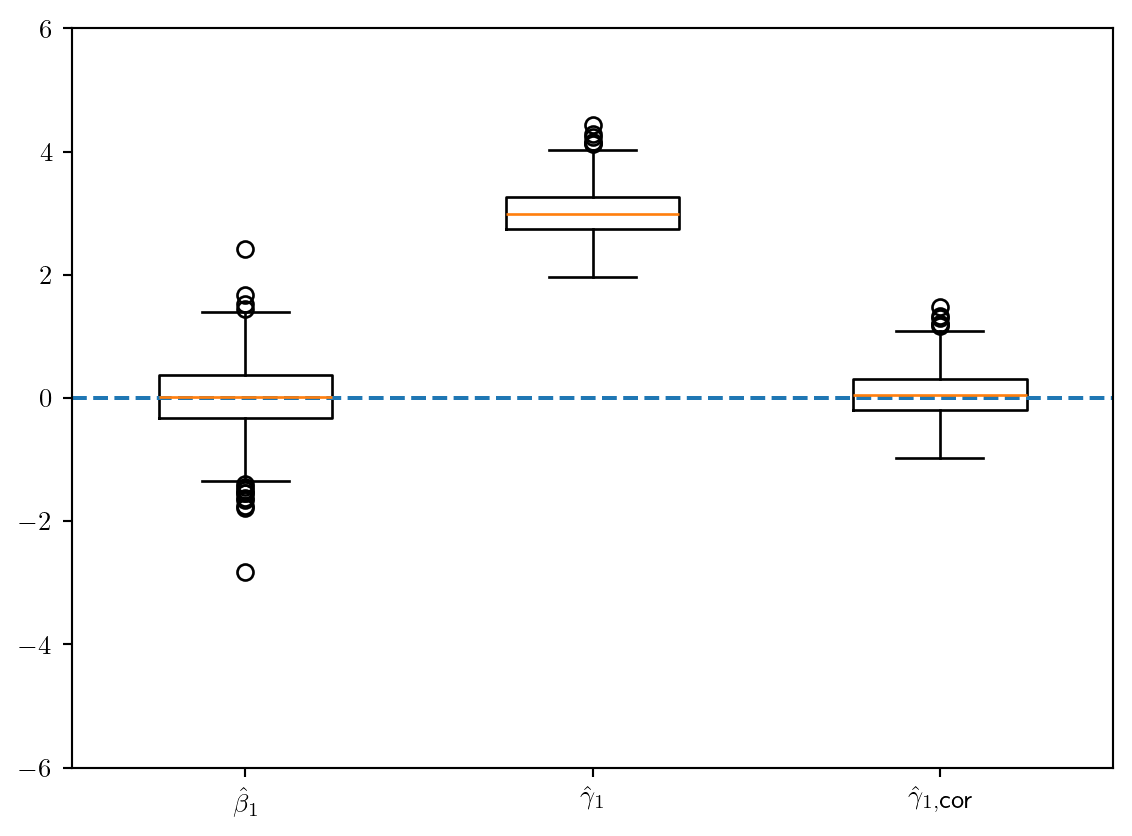

In [5]:
plt.rcParams.update({"text.usetex": True})
beta1_m3cor = beta1_m3 - np.log(0.95/0.05)
labels = [r"$\hat\beta_1$", r"$\hat\gamma_1$", r"$\hat\gamma_{1,\mbox{cor}}$"]
fig, ax1 = plt.subplots(1,1)
ax1.boxplot([beta1_m2, beta1_m3, beta1_m3cor], tick_labels=labels, widths=0.5)
ax1.set_ylim(-6,6)
ax1.axhline(0, linestyle='dashed')

In [6]:
df = pd.DataFrame({"MALADE": [208, 42], "NON_MALADE": [48, 202], "FUMEUR": ["OUI", "NON"]})
model = smf.glm("MALADE+NON_MALADE~FUMEUR", data=df, family=sm.families.Binomial()).fit()
round(model.params,3)

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  scale = np.dot(wresid, wresid) / df_resid
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Intercept       -1.571
FUMEUR[T.OUI]    3.037
dtype: float64

In [7]:
newX=pd.DataFrame({"FUMEUR": ["OUI", "NON"]})
model.predict(newX)

0    0.812500
1    0.172131
dtype: float64

In [8]:
beta1_cor = model.params.iloc[0] - np.log(0.995/0.005)
beta2 = model.params.iloc[1]
round((np.exp(beta1_cor+beta2)/(1+np.exp(beta1_cor+beta2))),3)

0.021

In [9]:
round((np.exp(beta1_cor)/(1+np.exp(beta1_cor))),3)

0.001

In [10]:
#| eval: false
r = 1
rus = RandomUnderSampler(sampling_strategy=r, random_state=0)
X_r, y_r = rus.fit_resample(X, y)
dfr = pd.DataFrame(X_r).assign(y_r = y_r)

In [11]:
#| eval: false
mod=smf.glm("y_r~...",data=dfr,family=sm.families.Binomial()).fit()

In [12]:
#| eval: false
n1 = df.Y.value_counts()[1]
gamma = model.params
gamma[0] - log(n1*r)

In [13]:
df = pd.read_csv('../donnees/dd_ex_ech_des1.csv', header=0, sep=';')
df.Y.value_counts()
y = df.Y
X = df.loc[:,["X1", "X2"]]

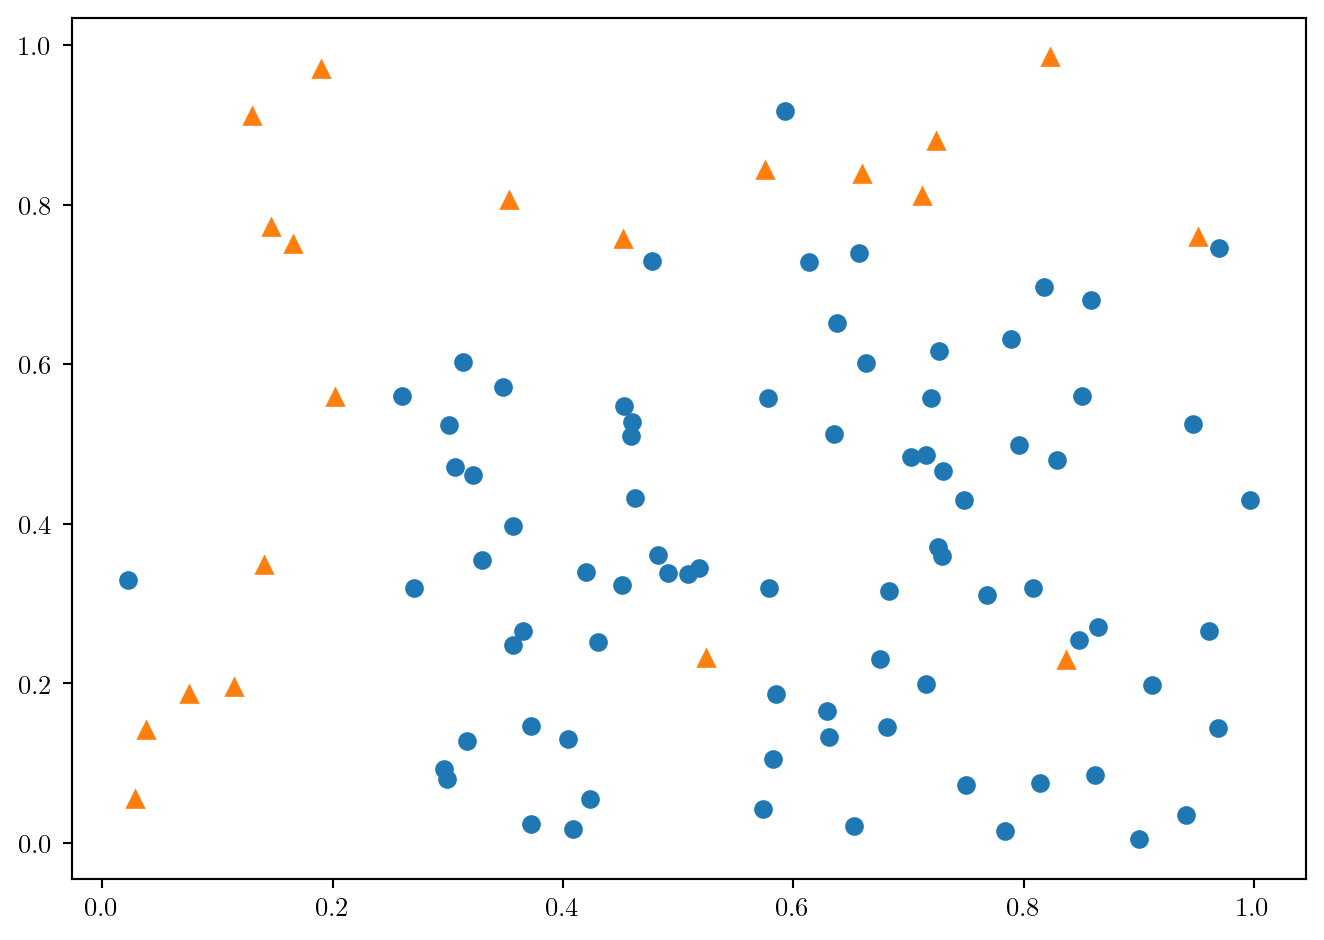

In [14]:
fig = plt.figure()
plt.plot(df.loc[df.Y==0, "X1"], df.loc[df.Y==0, "X2"], 'o', df.loc[df.Y==1, "X1"], df.loc[df.Y==1, "X2"], '^')
fig.tight_layout()

In [15]:
ros1 = RandomOverSampler(random_state=0)
Xreech1, yreech1 = ros1.fit_resample(X, y)
print(yreech1.value_counts())

Y
0    80
1    80
Name: count, dtype: int64


In [16]:
ros2 = RandomOverSampler(random_state=0, sampling_strategy={0: 80, 1: 40})
Xreech2, yreech2 = ros2.fit_resample(X, y)
print(yreech2.value_counts())

Y
0    80
1    40
Name: count, dtype: int64


In [17]:
over1 = pd.DataFrame(Xreech1)
over1["Y"] = yreech1

In [18]:
smote1 = SMOTE(random_state=42, k_neighbors=4)
Xreech1, yreech1 = smote1.fit_resample(X, y)
print(yreech1.value_counts())

Y
0    80
1    80
Name: count, dtype: int64


In [19]:
smote2 = SMOTE(random_state=423, k_neighbors=4, \
               sampling_strategy={0: 80, 1: 40})
Xreech2, yreech2 = smote2.fit_resample(X, y)
print(yreech2.value_counts())

Y
0    80
1    40
Name: count, dtype: int64


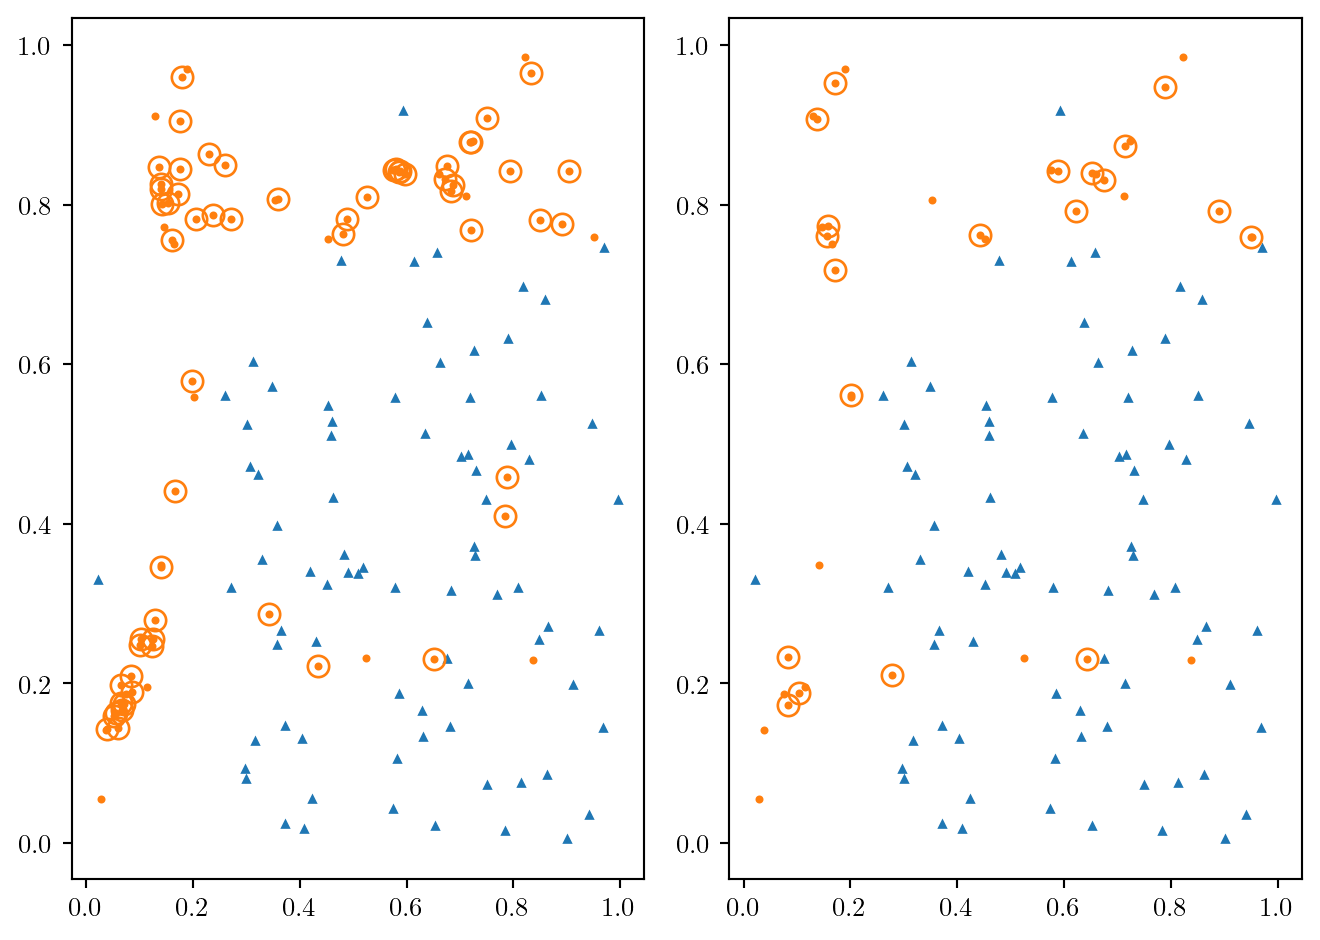

In [20]:
df1 = Xreech1.assign(Yreech = yreech1)
tmp = df1.merge(df, how="outer", on=['X1', 'X2'])
nouv1 = tmp.loc[tmp.Y.isna(), :]
nouv1.Yreech.value_counts()


df2 = Xreech2.assign(Yreech = yreech2)
tmp = df2.merge(df, how="outer", on=['X1', 'X2'])
nouv2 = tmp.loc[tmp.Y.isna(), :]
nouv2.Yreech.value_counts()


plt.rc("lines", markersize=2)
coul = ["C0", "C1"]
mark = ["^", "o"]
fig, (ax1, ax2) = plt.subplots(1,2)
for i in range(0,2):
    ax1.plot(df.loc[df.Y==i, "X1"], df.loc[df.Y==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax1.plot(nouv1.loc[nouv1.Yreech==i, "X1"], nouv1.loc[nouv1.Yreech==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax1.plot(nouv1.loc[nouv1.Yreech==i, "X1"], nouv1.loc[nouv1.Yreech==i, "X2"],\
             marker = mark[1], ms=8, mec=coul[i], mfc='#ffffff00', ls='')
    ax2.plot(df.loc[df.Y==i, "X1"], df.loc[df.Y==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax2.plot(nouv2.loc[nouv2.Yreech==i, "X1"], nouv2.loc[nouv2.Yreech==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax2.plot(nouv2.loc[nouv2.Yreech==i, "X1"], nouv2.loc[nouv2.Yreech==i, "X2"],\
             marker = mark[1], ms=8, mec=coul[i], mfc="#ffffff00", ls='')

fig.tight_layout()

In [21]:
y = df.Y
X = df.loc[:,["X1", "X2"]]
rus1 = RandomUnderSampler(random_state=38)
Xreech1, yreech1 = rus1.fit_resample(X, y)
print(yreech1.value_counts())

Y
0    20
1    20
Name: count, dtype: int64


In [22]:
rus2 = RandomUnderSampler(random_state=38, sampling_strategy={0: 40, 1: 20})
Xreech2, yreech2 = rus2.fit_resample(X, y)
print(yreech2.value_counts())

Y
0    40
1    20
Name: count, dtype: int64


In [23]:
tl1 = TomekLinks(sampling_strategy='all')
Xreech1, yreech1 = tl1.fit_resample(X, y)
print(yreech1.value_counts())

Y
0    76
1    16
Name: count, dtype: int64


In [24]:
tl2 = TomekLinks(sampling_strategy='majority')
Xreech2, yreech2 = tl2.fit_resample(X, y)
print(yreech2.value_counts())

Y
0    76
1    20
Name: count, dtype: int64


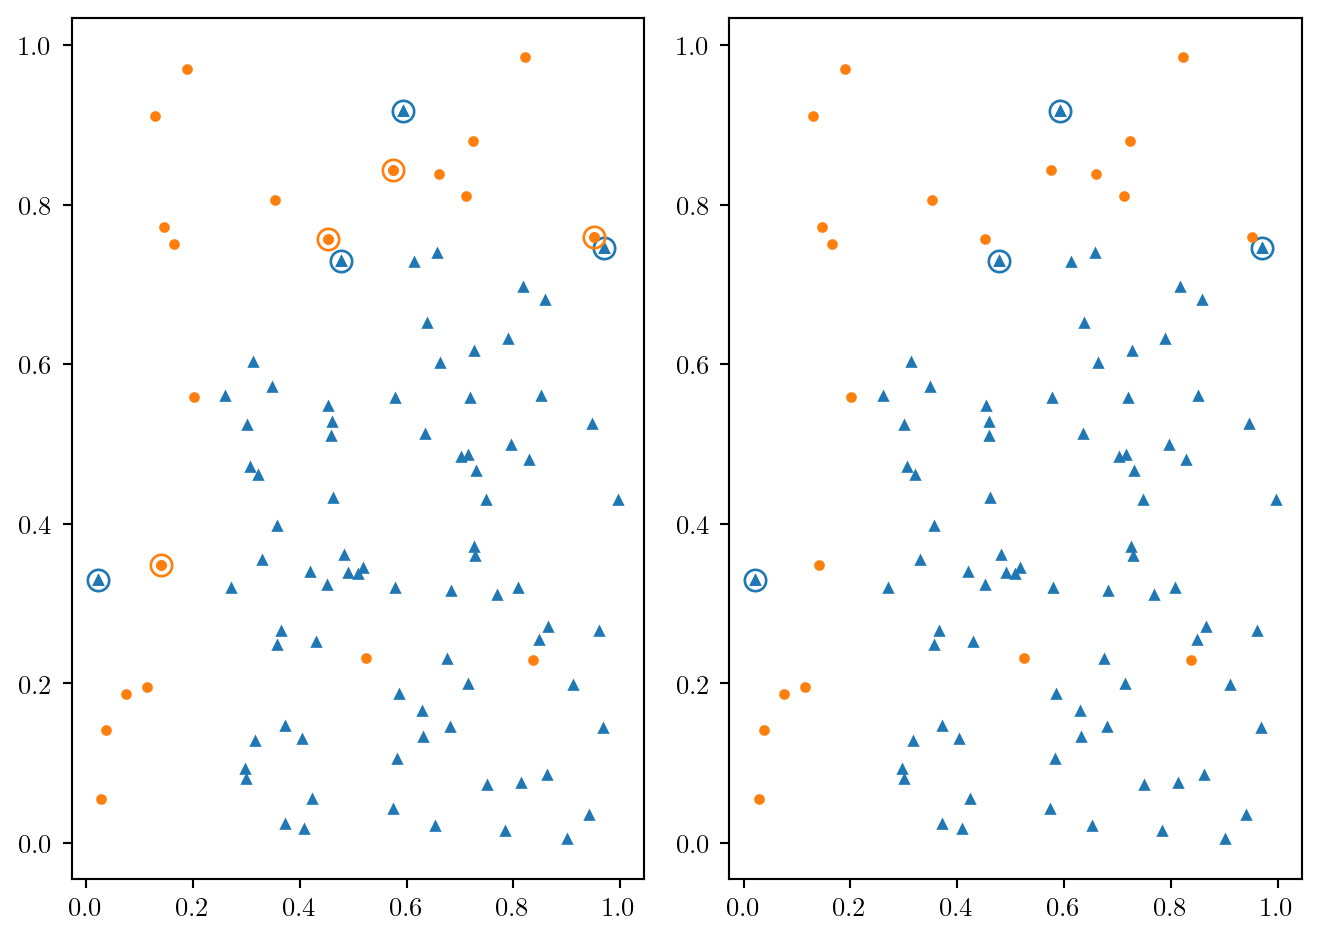

In [25]:
df1 = Xreech1.assign(Yreech = yreech1)
tmp = df.merge(df1, how="outer", on=['X1', 'X2'])
nouv1 = tmp.loc[tmp.Yreech.isna(), :]
nouv1.Y.value_counts()

df2 = Xreech2.assign(Yreech = yreech2)
tmp = df.merge(df2, how="outer", on=['X1', 'X2'])
nouv2 = tmp.loc[tmp.Yreech.isna(), :]
nouv2.Y.value_counts()


plt.rc("lines", markersize=3)
coul = ["C0", "C1"]
mark = ["^", "o"]
fig, (ax1, ax2) = plt.subplots(1,2)
for i in range(0,2):
    ax1.plot(df.loc[df.Y==i, "X1"], df.loc[df.Y==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax1.plot(nouv1.loc[nouv1.Y==i, "X1"], nouv1.loc[nouv1.Y==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax1.plot(nouv1.loc[nouv1.Y==i, "X1"], nouv1.loc[nouv1.Y==i, "X2"],\
             marker = mark[1], ms=8, mec=coul[i], mfc='#ffffff00', ls='')
    ax2.plot(df.loc[df.Y==i, "X1"], df.loc[df.Y==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax2.plot(nouv2.loc[nouv2.Y==i, "X1"], nouv2.loc[nouv2.Y==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax2.plot(nouv2.loc[nouv2.Y==i, "X1"], nouv2.loc[nouv2.Y==i, "X2"],\
             marker = mark[1], ms=8, mec=coul[i], mfc="#ffffff00", ls='')

fig.tight_layout()

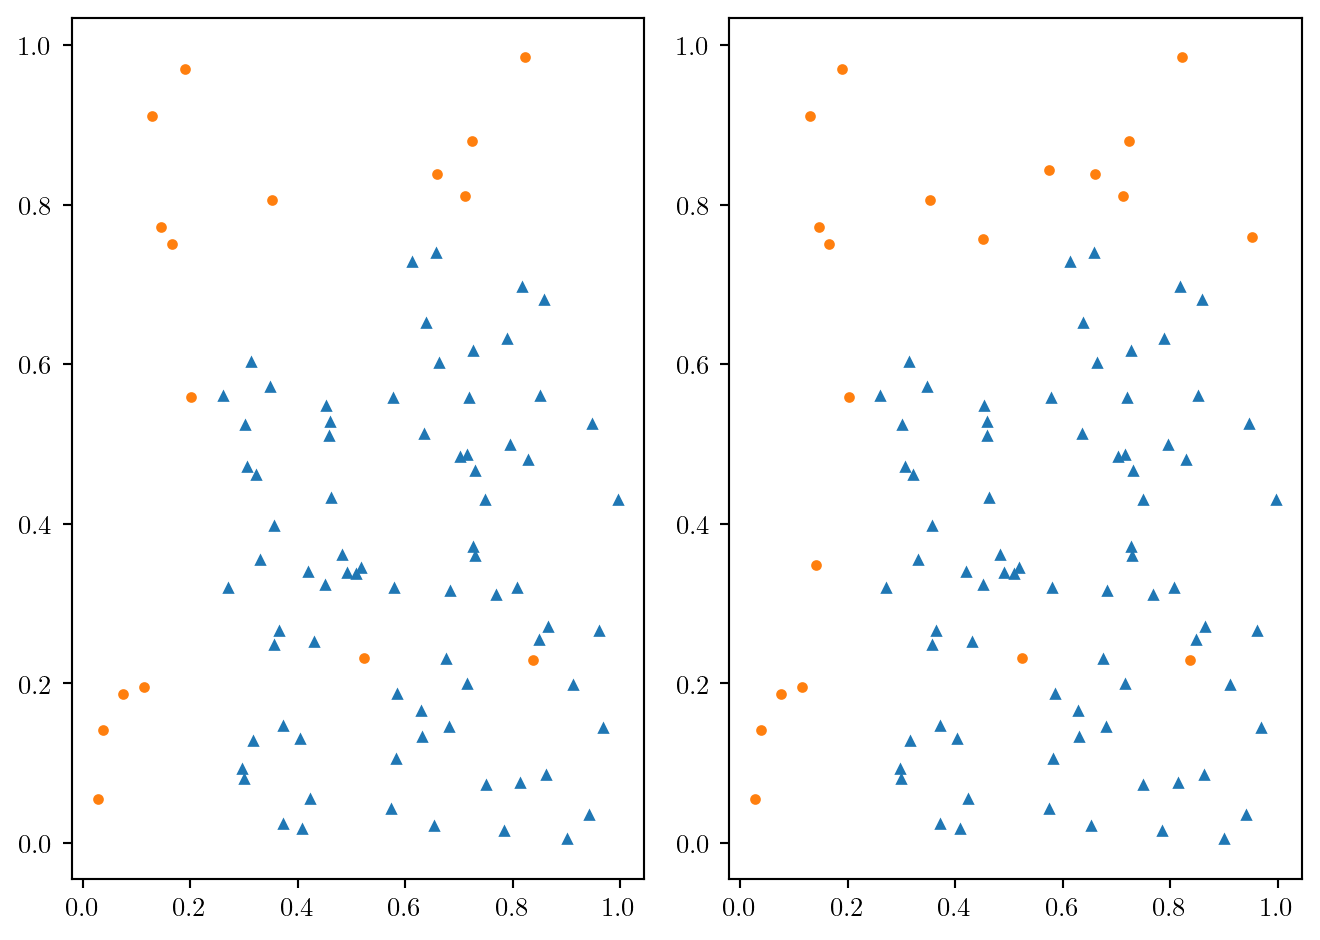

In [26]:
coul = ["C0", "C1"]
mark = ["^", "o"]
fig, (ax1, ax2) = plt.subplots(1,2)
for i in range(0,2):
    ax1.plot(df1.loc[df1.Yreech==i, "X1"], df1.loc[df1.Yreech==i, "X2"], marker=mark[i], c=coul[i], ls='')
    ax2.plot(df2.loc[df2.Yreech==i, "X1"], df2.loc[df2.Yreech==i, "X2"], marker=mark[i], c=coul[i], ls='')

fig.tight_layout()

In [27]:
df = pd.read_csv("../donnees/donnees_dondesequilib.csv", header=0, sep=';')
print(pd.crosstab(index=df.Y, columns=df.P1))

P1    0  1
Y         
0   468  0
1    31  1


In [28]:
print(pd.crosstab(index=df.Y, columns=df.P2))

P2    0   1
Y          
0   407  61
1     4  28


In [29]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, cohen_kappa_score
print(np.round(accuracy_score(df.Y, df.P2), 3))
print(np.round(balanced_accuracy_score(df.Y, df.P2), 3))
print(np.round(f1_score(df.Y, df.P2), 3))
print(np.round(cohen_kappa_score(df.Y, df.P2), 3))

0.87
0.872
0.463
0.407


In [30]:
ad = pd.read_csv("../donnees/ad_data.txt", header=None ,sep=",",\
                 na_values = "?", skipinitialspace=True, keep_default_na=True)
noms = ["X" + str(i+1) for i in range(ad.shape[1] - 1)]
noms.append("Y")
ad.columns = noms
ad1 = ad.dropna(axis=1)
ad1.loc[:,"Y"] = ad1["Y"].astype("category").cat.rename_categories({"nonad.": 0, "ad.": 1})
X =  ad1.iloc[:,:-1]
y = pd.to_numeric(ad1.iloc[:,-1])
ad1.Y.value_counts()

Y
0    2820
1     459
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
def grille(X, y, type = "lasso", ng=400):
    """
    X: tableau des var explicatives au format sklearn
    y: variable a expliquer au format sklearn
    type: "lasso" ou "ridge" ou "enet"
    ng: nombre de valeur dans le chemin

    retourne la grille
    """
    scalerX = StandardScaler().fit(X)
    Xcr= scalerX.transform(X)
    l0 = np.abs(Xcr.transpose().dot((y  - y.mean()))).max()/X.shape[0]
    llc = np.linspace(0,-4,ng)
    ll = l0*10**llc
    if type=="lasso":
        Cs = 1/ 0.9/ X.shape[0] / (l0*10**(llc))
    elif type=="ridge":
        Cs = 1/ 0.9/ X.shape[0] / ((l0*10**(llc)) * 100)
    elif type=="enet":
        Cs = 1/ 0.9/ X.shape[0] / ((l0*10**(llc)) * 2)
    return Cs

In [32]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
RES = pd.DataFrame(pd.to_numeric(ad1.iloc[:,ad1.shape[1]-1]))
for i in ["Logistic", "Lasso", "Ridge"]:
    for j in ["brut", "ros", "smote", "rus", "tomek"]:
        RES = RES.assign(**{i + "_" + j: 0})

In [33]:
#| eval: false

for app_index, val_index in skf.split(X,y):
    Xapp = X.iloc[app_index,:-1]
    yapp = y.iloc[app_index]
    Xval = X.iloc[val_index,:-1]
    # grille
    Cs_lasso = grille(Xapp, yapp, "lasso")
    Cs_ridge = grille(Xapp, yapp, "ridge")
    # instanciation
    cr = StandardScaler()
    logistic =  LogisticRegression(penalty=None, solver="newton-cholesky" )
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
    pipe_logistic = Pipeline(steps=[("cr", cr), ("logistic", logistic)])
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    # fit brut
    pipe_logistic.fit(Xapp, yapp)
    pipe_lassocv.fit(Xapp, yapp)
    pipe_ridgecv.fit(Xapp, yapp)
    # prediction
    RES.loc[val_index,"Logistic_brut"] = pipe_logistic.predict(Xval).ravel()
    RES.loc[val_index,"Lasso_brut"] = pipe_lassocv.predict(Xval).ravel()
    RES.loc[val_index,"Ridge_brut"] = pipe_ridgecv.predict(Xval).ravel()

In [34]:
#| eval: false

for app_index, val_index in skf.split(X,y):
    Xapp = X.iloc[app_index,:-1]
    yapp = y.iloc[app_index]
    Xval = X.iloc[val_index,:-1]
    ## RandomOverSampler
    ros1 = RandomOverSampler(random_state=123)
    Xreech, yreech = ros1.fit_resample(Xapp, yapp)
    # grille
    Cs_lasso = grille(Xreech, yreech, "lasso")
    Cs_ridge = grille(Xreech, yreech, "ridge")
    # instanciation
    cr = StandardScaler()
    logistic =  LogisticRegression(penalty=None, solver="newton-cholesky")
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
    pipe_logistic = Pipeline(steps=[("cr", cr), ("logistic", logistic)])
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    # fit
    pipe_logistic.fit(Xreech, yreech)
    pipe_lassocv.fit(Xapp, yapp)
    pipe_ridgecv.fit(Xreech, yreech)
    # prediction
    RES.loc[val_index,"Logistic_ros"] = pipe_logistic.predict(Xval).ravel()
    RES.loc[val_index,"Lasso_ros"] = pipe_lassocv.predict(Xval).ravel()
    RES.loc[val_index,"Ridge_ros"] = pipe_ridgecv.predict(Xval).ravel()
    ## Smote
    sm = RandomOverSampler(random_state=123)
    Xreech, yreech = sm.fit_resample(Xapp, yapp)
    # grille
    Cs_lasso = grille(Xreech, yreech, "lasso")
    Cs_ridge = grille(Xreech, yreech, "ridge")
    # instanciation
    cr = StandardScaler()
    logistic =  LogisticRegression(penalty=None, solver="newton-cholesky")
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
    pipe_logistic = Pipeline(steps=[("cr", cr), ("logistic", logistic)])
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    # fit
    pipe_logistic.fit(Xreech, yreech)
    pipe_lassocv.fit(Xapp, yapp)
    pipe_ridgecv.fit(Xreech, yreech)
    # prediction
    RES.loc[val_index,"Logistic_smote"] = pipe_logistic.predict(Xval).ravel()
    RES.loc[val_index,"Lasso_smote"] = pipe_lassocv.predict(Xval).ravel()
    RES.loc[val_index,"Ridge_smote"] = pipe_ridgecv.predict(Xval).ravel()

In [35]:
#| eval: false

for app_index, val_index in skf.split(X,y):
    Xapp = X.iloc[app_index,:-1]
    yapp = y.iloc[app_index]
    Xval = X.iloc[val_index,:-1]
    ## RandomUnderSampler
    rus1 = RandomUnderSampler(random_state=123)
    Xreech, yreech = rus1.fit_resample(Xapp, yapp)
    # grille
    Cs_lasso = grille(Xreech, yreech, "lasso")
    Cs_ridge = grille(Xreech, yreech, "ridge")
    # instanciation
    cr = StandardScaler()
    logistic =  LogisticRegression(penalty=None,solver="newton-cholesky" )
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
    pipe_logistic = Pipeline(steps=[("cr", cr), ("logistic", logistic)])
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    # fit
    pipe_logistic.fit(Xreech, yreech)
    pipe_lassocv.fit(Xapp, yapp)
    pipe_ridgecv.fit(Xreech, yreech)
    # prediction
    RES.loc[val_index,"Logistic_rus"] = pipe_logistic.predict(Xval).ravel()
    RES.loc[val_index,"Lasso_rus"] = pipe_lassocv.predict(Xval).ravel()
    RES.loc[val_index,"Ridge_rus"] = pipe_ridgecv.predict(Xval).ravel()
    ## Tomek
    tl = TomekLinks(sampling_strategy='all')
    Xreech, yreech = tl.fit_resample(Xapp, yapp)
    # grille
    Cs_lasso = grille(Xreech, yreech, "lasso")
    Cs_ridge = grille(Xreech, yreech, "ridge")
    # instanciation
    cr = StandardScaler()
    logistic =  LogisticRegression(penalty=None, solver="newton-cholesky")
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
    pipe_logistic = Pipeline(steps=[("cr", cr), ("logistic", logistic)])
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    # fit
    pipe_logistic.fit(Xreech, yreech)
    pipe_lassocv.fit(Xapp, yapp)
    pipe_ridgecv.fit(Xreech, yreech)
    # prediction
    RES.loc[val_index,"Logistic_tomek"] = pipe_logistic.predict(Xval).ravel()
    RES.loc[val_index,"Lasso_tomek"] = pipe_lassocv.predict(Xval).ravel()
    RES.loc[val_index,"Ridge_tomek"] = pipe_ridgecv.predict(Xval).ravel()

In [36]:
#| echo: false

RES= pd.read_csv('../data_aux/RES_ad_des_final.csv', header=0, sep=';')

In [37]:
auc = pd.Series(0.0, index=RES.columns[1:])
for i in range(auc.shape[0]):
    auc.iloc[i] = sklm.roc_auc_score(RES.Y, RES.iloc[:,i+1])

round(auc,3)

Logistic_brut     0.914
Logistic_ros      0.905
Logistic_smote    0.905
Logistic_rus      0.890
Logistic_tomek    0.917
Lasso_brut        0.907
Lasso_ros         0.687
Lasso_smote       0.687
Lasso_rus         0.690
Lasso_tomek       0.908
Ridge_brut        0.912
Ridge_ros         0.924
Ridge_smote       0.924
Ridge_rus         0.919
Ridge_tomek       0.911
dtype: float64

In [38]:
acc = pd.Series(0.0, index=RES.columns[1:])
s = 0.5
for i in range(acc.shape[0]):
    acc.iloc[i] = 1-sklm.zero_one_loss(RES.Y, RES.iloc[:,i+1]>s)

round(acc,3)

Logistic_brut     0.956
Logistic_ros      0.949
Logistic_smote    0.949
Logistic_rus      0.892
Logistic_tomek    0.958
Lasso_brut        0.970
Lasso_ros         0.912
Lasso_smote       0.912
Lasso_rus         0.912
Lasso_tomek       0.970
Ridge_brut        0.971
Ridge_ros         0.958
Ridge_smote       0.958
Ridge_rus         0.947
Ridge_tomek       0.970
dtype: float64

In [39]:
bal = pd.Series(0.0, index=RES.columns[1:])
s = 0.5
for i in range(bal.shape[0]):
    bal.iloc[i] = sklm.balanced_accuracy_score(RES.Y, RES.iloc[:,i+1]>s)

round(bal,3)

Logistic_brut     0.914
Logistic_ros      0.905
Logistic_smote    0.905
Logistic_rus      0.890
Logistic_tomek    0.917
Lasso_brut        0.907
Lasso_ros         0.687
Lasso_smote       0.687
Lasso_rus         0.690
Lasso_tomek       0.908
Ridge_brut        0.912
Ridge_ros         0.924
Ridge_smote       0.924
Ridge_rus         0.919
Ridge_tomek       0.911
dtype: float64

In [40]:
f1s = pd.Series(0.0, index=RES.columns[1:])
s = 0.5
for i in range(f1s.shape[0]):
    f1s.iloc[i] = sklm.f1_score(RES.Y, RES.iloc[:,i+1]>s)

round(f1s,3)

Logistic_brut     0.845
Logistic_ros      0.822
Logistic_smote    0.822
Logistic_rus      0.697
Logistic_tomek    0.852
Lasso_brut        0.883
Lasso_ros         0.543
Lasso_smote       0.543
Lasso_rus         0.549
Lasso_tomek       0.885
Ridge_brut        0.889
Ridge_ros         0.854
Ridge_smote       0.854
Ridge_rus         0.822
Ridge_tomek       0.887
dtype: float64

In [41]:
kappa_scores = pd.Series(0.0, index=RES.columns[1:])
s = 0.5
for i in range(kappa_scores.shape[0]):
    kappa_scores.iloc[i] = sklm.cohen_kappa_score(RES.Y, RES.iloc[:,i+1] > s)

round(kappa_scores, 3)

Logistic_brut     0.820
Logistic_ros      0.792
Logistic_smote    0.792
Logistic_rus      0.635
Logistic_tomek    0.828
Lasso_brut        0.865
Lasso_ros         0.504
Lasso_smote       0.504
Lasso_rus         0.510
Lasso_tomek       0.868
Ridge_brut        0.873
Ridge_ros         0.829
Ridge_smote       0.829
Ridge_rus         0.791
Ridge_tomek       0.870
dtype: float64